# Project 2: Investigate TMDb Movies Dataset
## Areej Alzahrani

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This is the second project in the data analysis course. It's to investigate a data set and perform analysis and visualization. The selected data set is TMDb Movies Dataset - it is uploaded under the data direcotiry-. Through out this notebook, will go through data wrangling, data exploring and finally concluding the results and findings. 
Two questions, to analyze the dataset: Which genres are most popular from year to year?, and What kinds of properties are associated with movies that have high revenues?

In [1]:
import matplotlib as plt # plot and visualize data
import pandas as pd # read and write csv dataframes and manipulate series
import numpy as np # 
%matplotlib inline

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('./Data/tmdb-movies.csv')

# print out few lines of the data
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# printing columns types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

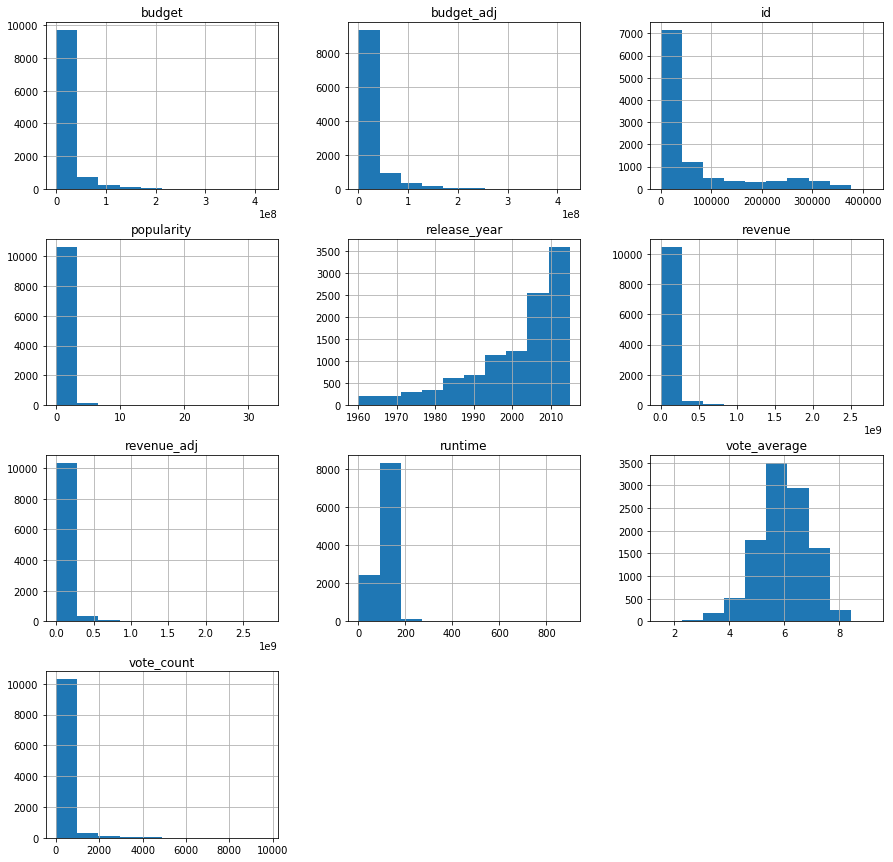

In [5]:
# plotting the columns distributions with each other
df.hist(figsize=(15,15));



### Data Condensing and Cleaning

In [6]:
# Here I will trim the columns I dont need and then store the needed columns and data in a new file
labels = ['original_title', 'genres', 'budget', 'revenue', 'release_year',
          'homepage', 'runtime', 'vote_average', 'director']
df_new = pd.read_csv('./Data/tmdb-movies.csv',header=0, usecols=labels)
print(sum(df_new.isnull().any()))
df_new.head()

3


,budget,revenue,original_title,homepage,director,runtime,genres,vote_average,release_year
0,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,137,Action|Crime|Thriller,7.3,2015


In [7]:
def clean_genres():
    """
    This function will clean the genres Nan entries
    with the most used genre
    """
    genres = []
    for gen in df.genres:
        if(not pd.isnull(gen)):
            genres.extend(gen.split('|'))

    genres = pd.Series(genres)
    genres.value_counts().plot(kind='bar')
    # As seen from the diagram below, Drama is the most common category, so I will fill it in the nan entries
    df_new['genres'] = df_new['genres'].fillna('Drama')

In [8]:
def clean_director():
    """
    This function will clean the director Nan entries
    with the most used director :)
    """
    director = df_new['director'].describe().top
    df_new['director'] = df_new['director'].fillna(director)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


(3855, 9)

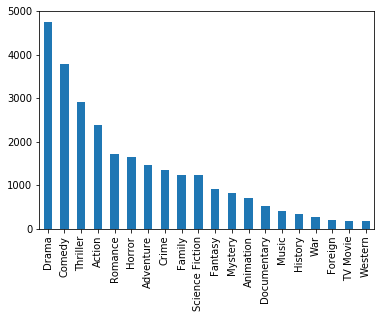

In [9]:
# Clean Nan entries

# movies with 0 budget or revenue will be dropped as they are considered flawed data
df_new = df_new.drop(df_new[df_new['budget']==0].index.values, axis=0)
df_new = df_new.drop(df_new[df_new['revenue']==0].index.values, axis=0)
# gernes column: use most repeated genres to fill nan entries
clean_genres()
# homepage column: movies with homepage will have value 1
# others, will have 0
tempF = df_new[df_new['homepage'].isnull() == False]
tempT = df_new[df_new['homepage'].isnull() == True]
tempF['homepage'] = 1
tempT['homepage'] = 0
tempAll = tempF.append(tempT)
df_new['homepage'] = tempAll['homepage']
# director column: use most repeated director to fill nan entries
clean_director()
df_new.shape

In [10]:
df_new.head()

,budget,revenue,original_title,homepage,director,runtime,genres,vote_average,release_year
0,150000000,1513528810,Jurassic World,1,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,1,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,110000000,295238201,Insurgent,1,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,1,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,190000000,1506249360,Furious 7,1,James Wan,137,Action|Crime|Thriller,7.3,2015


In [11]:
# Check that data stored correctly and store the data
print(sum(df_new.isnull().any()))
df_new.to_csv('./Data/tmdb-movies-summary.csv', index=False)

0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which genres are most popular from year to year?

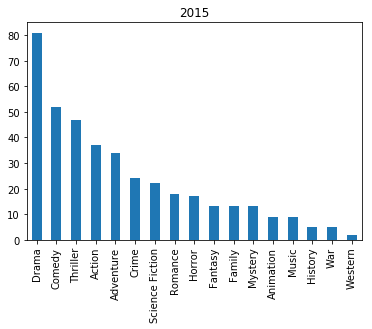

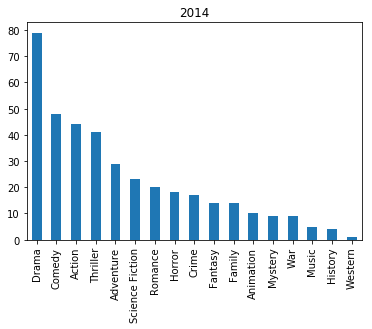

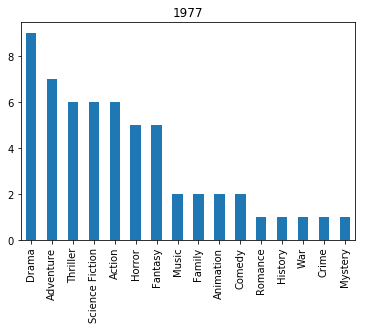

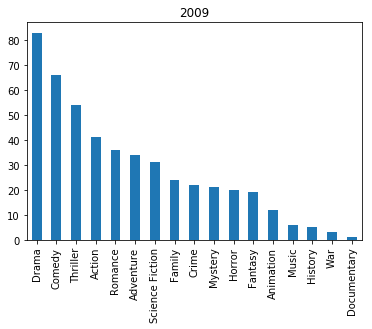

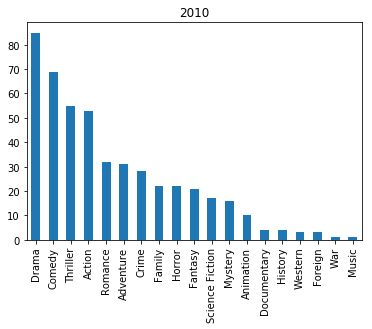

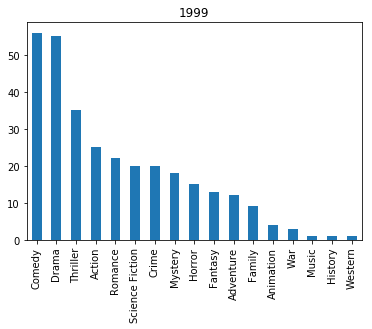

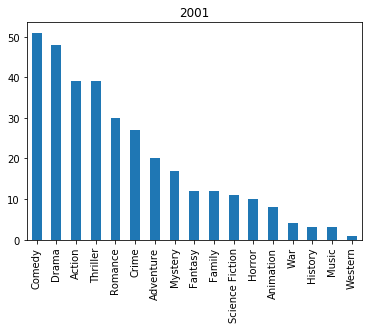

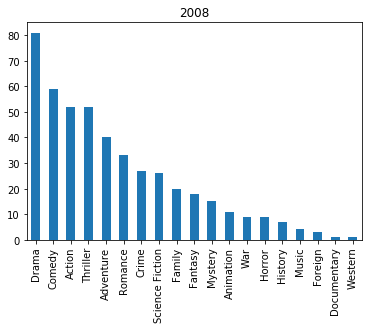

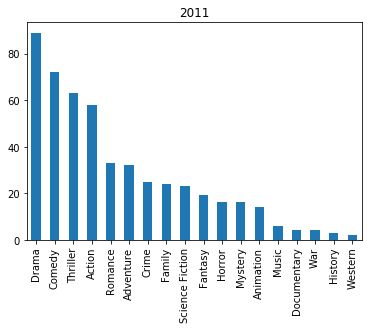

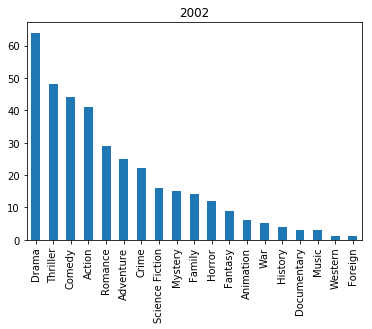

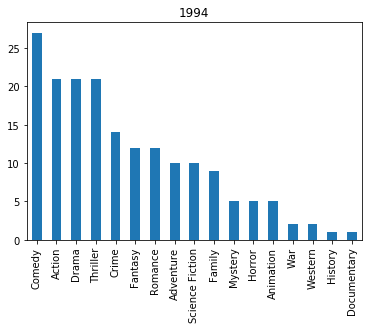

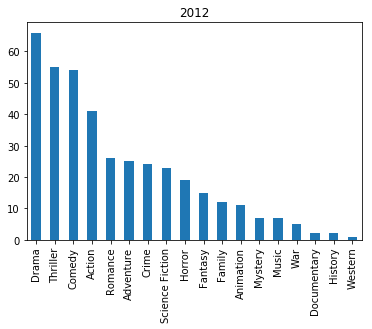

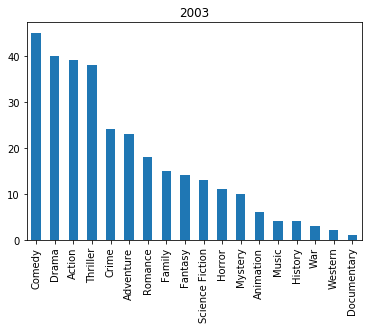

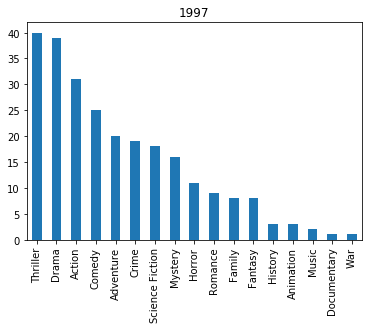

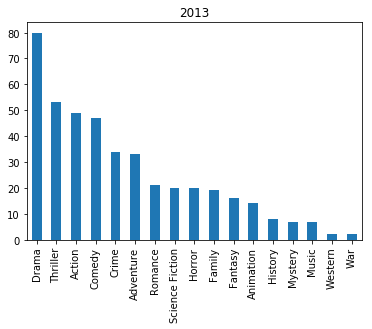

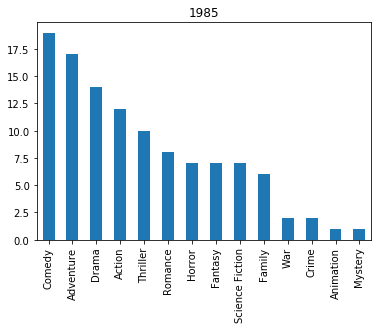

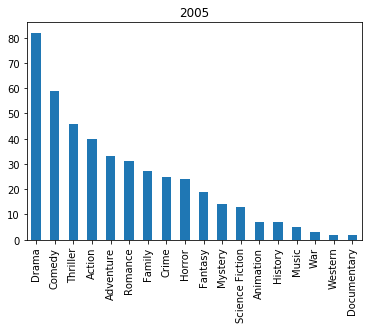

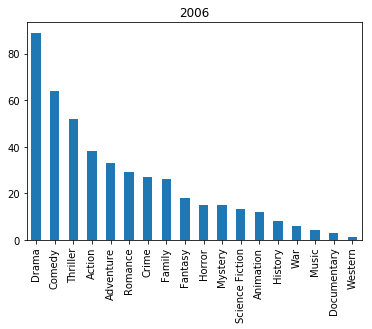

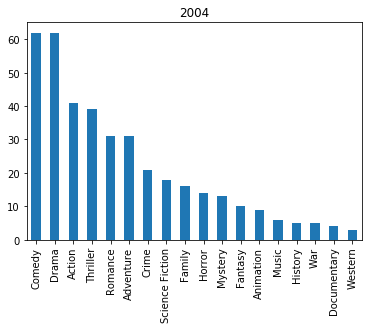

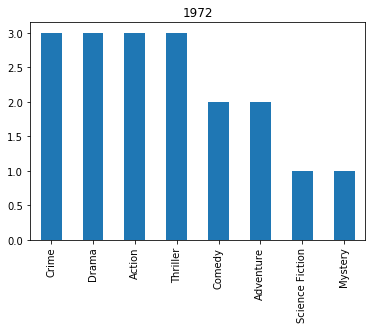

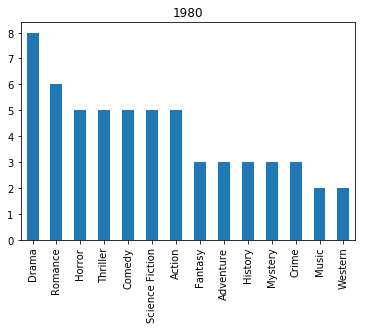

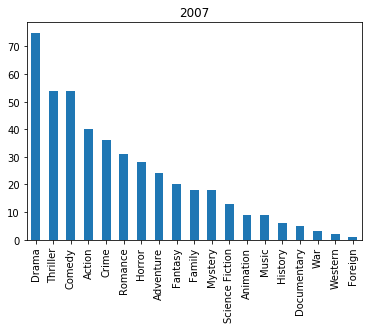

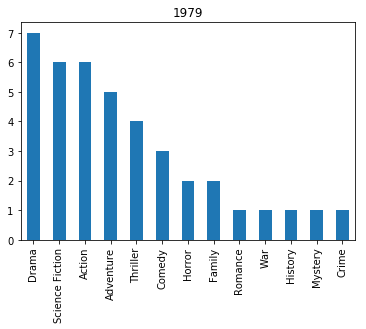

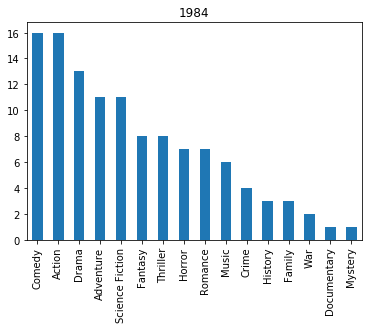

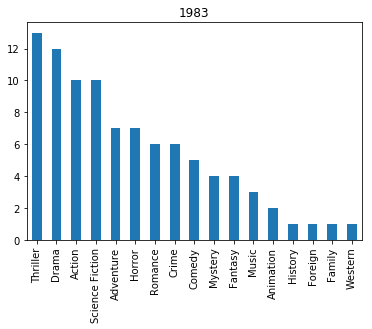

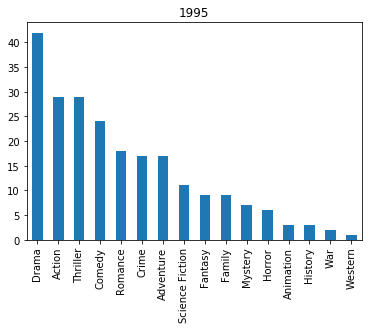

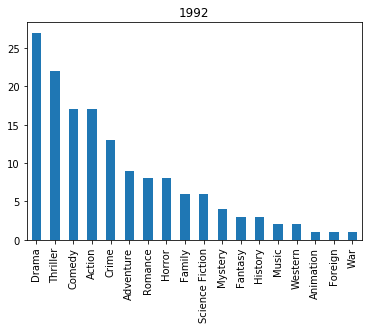

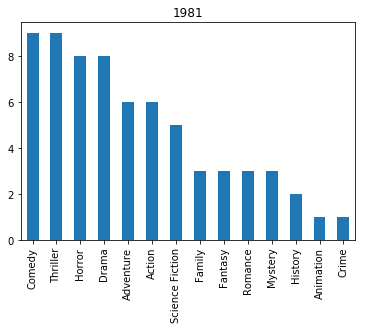

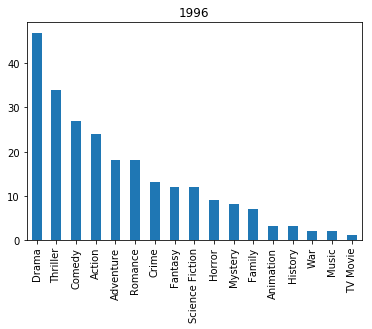

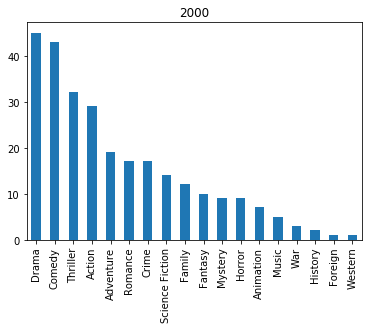

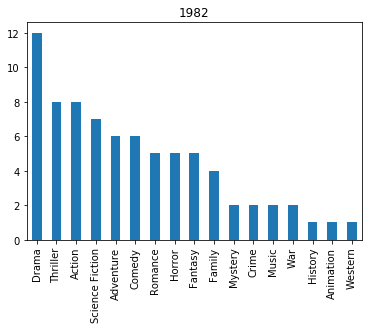

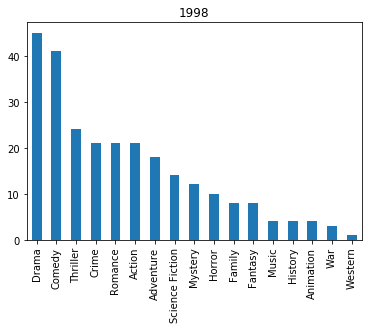

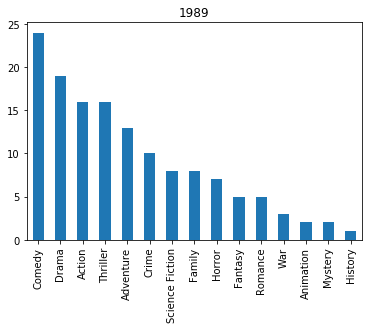

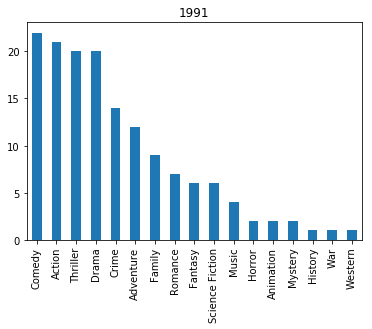

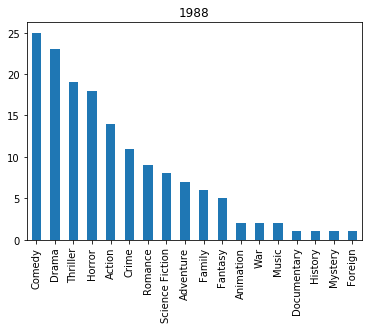

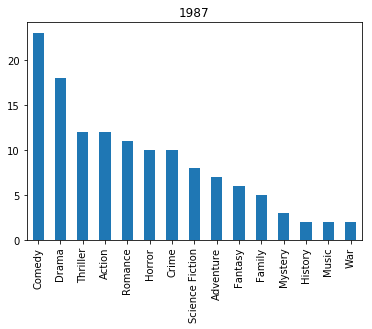

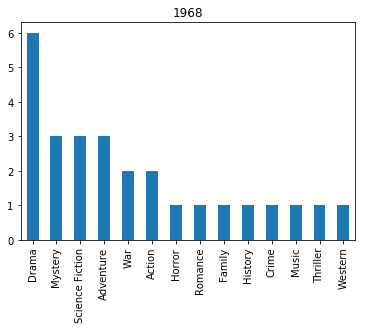

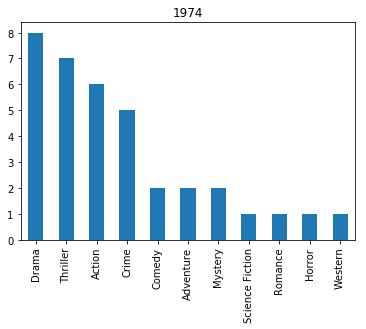

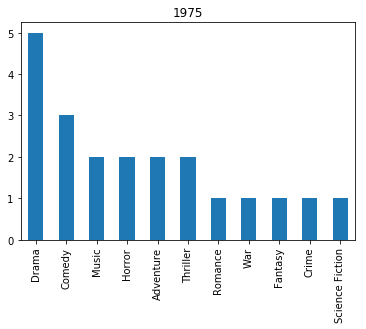

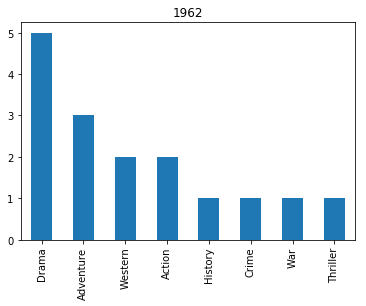

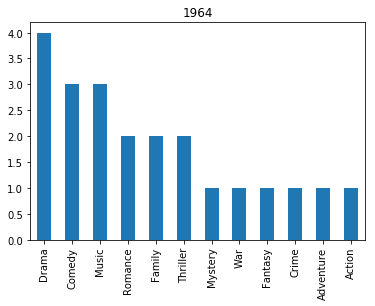

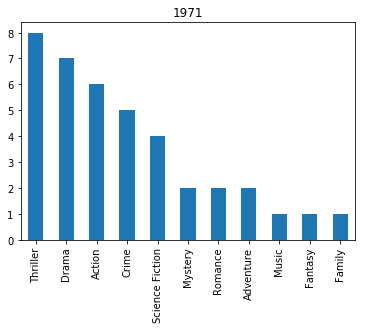

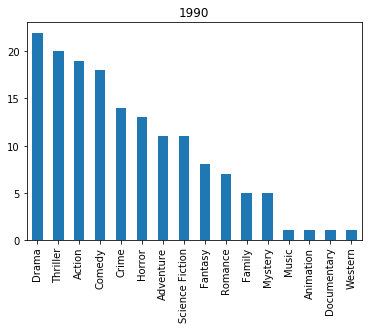

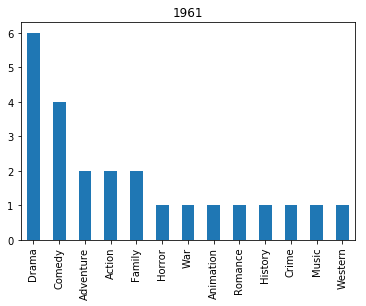

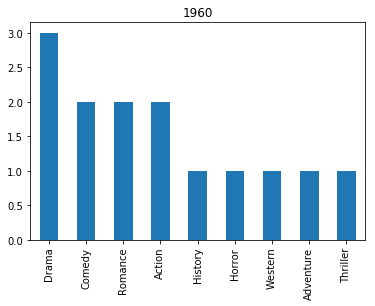

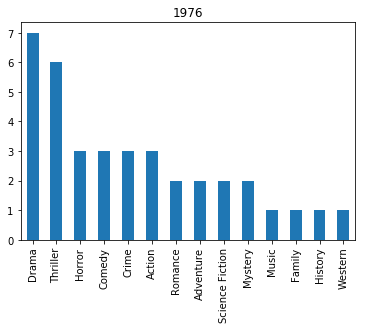

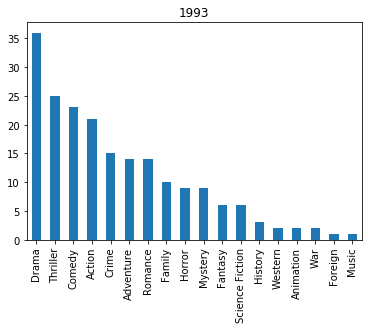

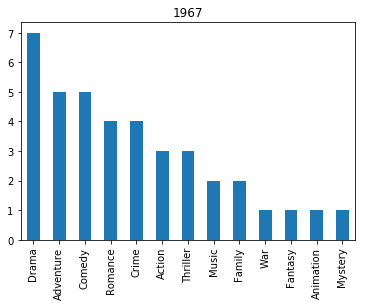

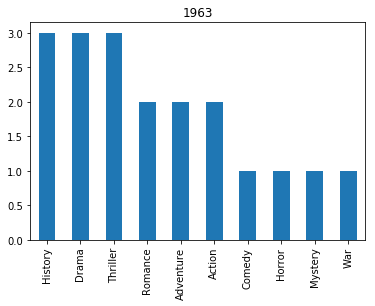

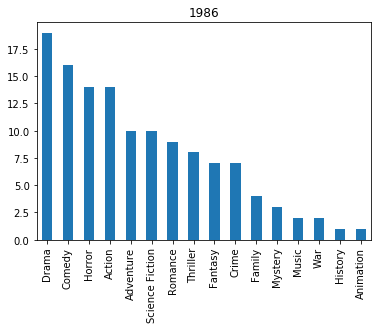

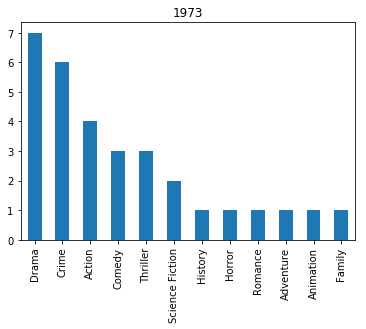

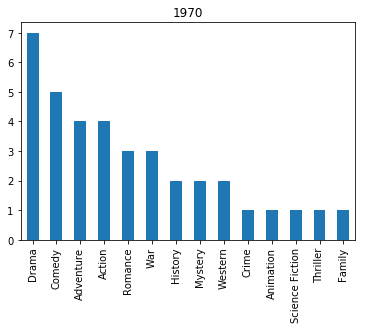

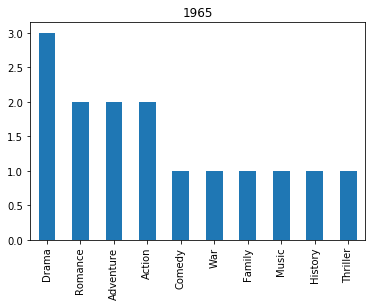

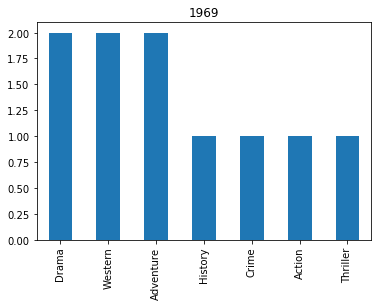

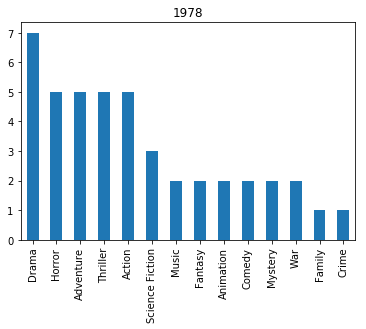

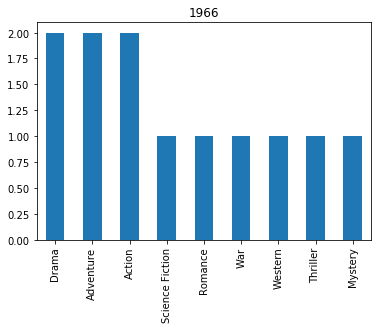

In [12]:
# set up value to store each year diagram's data
diag = {}
# store the list of the years of the df_new dataframe
years = df_new.release_year.drop_duplicates().values
# loop through the years and count the genres of all movies in that year to plot it as bar chart
for year in years:
    diag = []  # reset the value
    for gen in df_new[df_new['release_year'] == year].genres:
        diag.extend(gen.split('|'))
    diag = pd.Series(diag) # convert the list to Pandas Series to use the value_counts()
    diag.value_counts().plot(kind='bar', title=year);
    plt.pyplot.show()

### What kinds of properties are associated with movies that have high revenues?

In [13]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

# Are movies with High revenue have:
#            1. high vote_rate?
#            2. have a homepage?
#            3. short or long runtime?
#            4. high budget?
#            5. specific director?

df_new = pd.read_csv('./Data/tmdb-movies-summary.csv')
# choose the 75% to state high revenue
haRev = df_new['revenue'].describe()['75%']
df_new.loc[df_new['revenue']>=haRev, 'revenue'] = 'high'
df_new.loc[df_new['revenue']!='high', 'revenue'] = 'low'
df_new.head()

,budget,revenue,original_title,homepage,director,runtime,genres,vote_average,release_year
0,150000000,high,Jurassic World,1,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,150000000,high,Mad Max: Fury Road,1,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,110000000,high,Insurgent,1,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,200000000,high,Star Wars: The Force Awakens,1,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,190000000,high,Furious 7,1,James Wan,137,Action|Crime|Thriller,7.3,2015


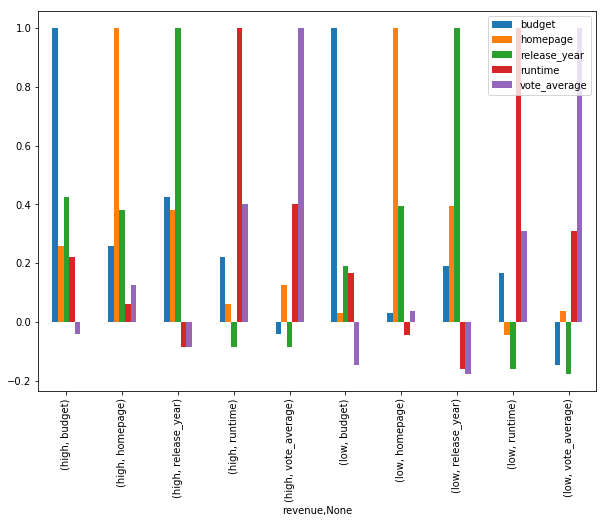

In [14]:
# The correlatin between the columns
df_new.groupby('revenue').corr().plot(kind='bar',legend=True, figsize=(10,7));

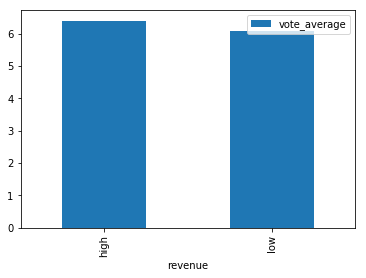

In [15]:
# check the effect of voting average on the revenue
"""
As you can see high revenue movies are more likely to have high vote average
though it's almost equivalent between high and low revenue movies 
"""
df_new.groupby('revenue')['vote_average'].mean().plot(kind='bar',legend=True);

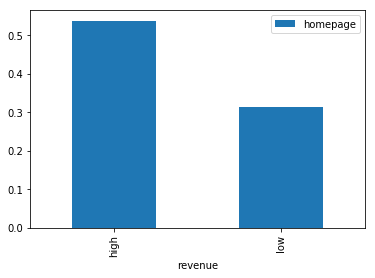

In [16]:
# check the effect of having a homepage on the revenue
"""
As you can see high revenue movies are more likely to have a homepage
"""
df_new.groupby('revenue')['homepage'].mean().plot(kind='bar',legend=True);

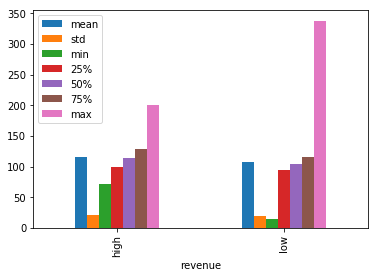

In [17]:
# check the effect of movie runtime on the revenue
"""
As you can see high revenue movies have higher values 
for the min, mean, 25%, 50%, and 75% except for the max value
which mean that high revenue movies are more likely to have high
runtime.
"""
df_new.groupby('revenue').describe()['runtime'][['mean','std','min','25%', '50%','75%','max']].plot(kind='bar');

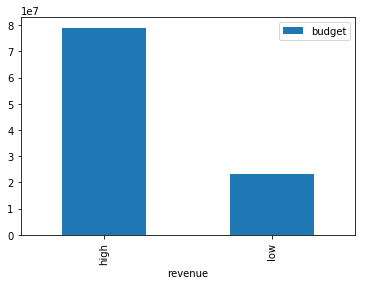

In [18]:
# check the effect of the budget on the revenue
"""
As you can see high revenue movies are more likely to have a budget
"""
df_new.groupby('revenue')['budget'].mean().plot(kind='bar',legend=True);

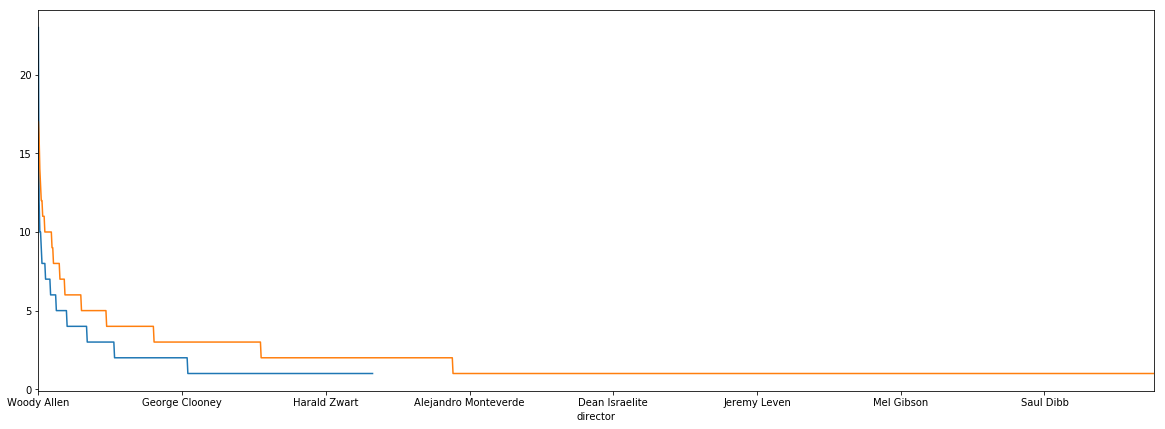

In [19]:
# check the effect of the director on the revenue
### NOTE: only directors with more than one movie
###       are considered
"""
As you can see the directos doesn't affect the revenue as much 
"""
df_new.groupby('revenue')['director'].value_counts()['high'].plot(kind='line', figsize=(20,7));
df_new.groupby('revenue')['director'].value_counts()['low'].plot(kind='line',figsize=(20,7));

<a id='conclusions'></a>
## Conclusions
In conclusion, Drama and Comedy genres are the most popular genres of the years and thriller, Action, Adventures are moderately haigh in most years (Exploring Section - Question 1). Also, the analysis showed that a high revenue movie is associated with some characteristics such as having a homepage, movie runtime, director, budget which are positively correlated with high revenue movies but suprisingly the vote average of the high and low revenue movies seems to be not a very characteristic since the mean is almost same. Moreover, the director is not a main effect on the movies revenue.

In [20]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255